In [1]:
## goal, for each stroke in behavior, map it onto a corresponding correct stroke in task.
# do this by minimizing distance between drawing and task as a function of what real stroke assigned
# what fake stroke.

""" goal: analysis of kineamtics of trials.
align multiople trials of same task.
assess statistics of actions
"""

%load_ext autoreload
%autoreload 2
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *


In [72]:
animal = "Pancho";
date = 200226
expt = "pilot"
session = 1

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

from tools.utils import *
getMultTrialsTaskStages(filedata)

found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.h5']
found one matching filename: ['/data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl']
-- loaded presaved data: /data2/animals/Pancho/200226/200226_121930_pilot_Pancho_1.pkl


{'line_natural': 6,
 'line': 116,
 'three_lines_natural': 19,
 'one_dot': 28,
 'two_lines_natural': 20,
 'circle_partial': 172,
 'two_lines_anywhere': 256}

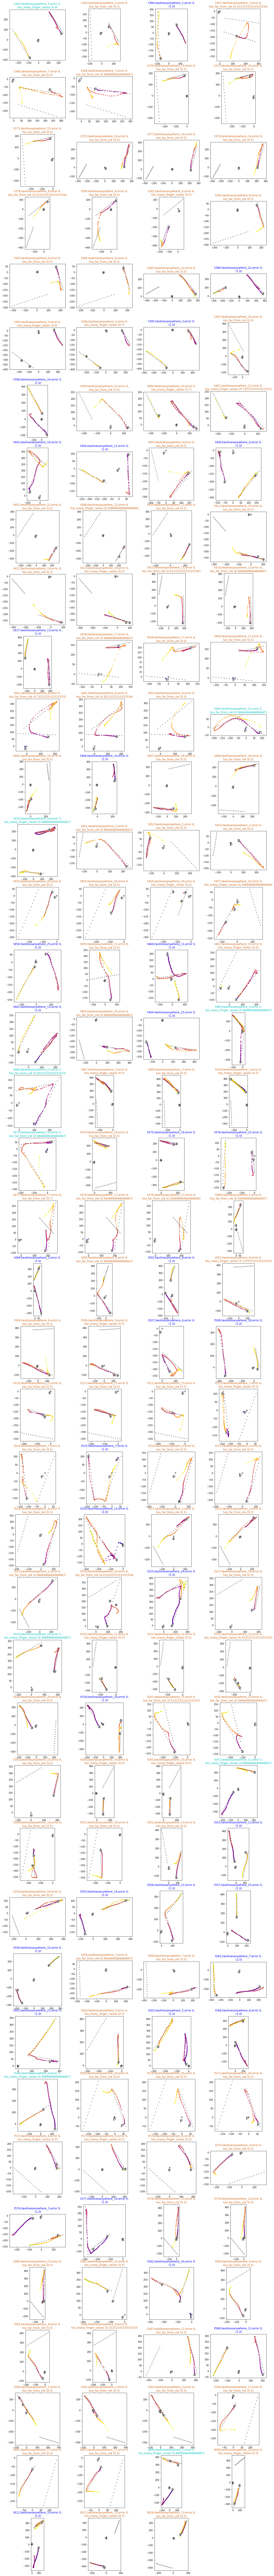

In [317]:
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["two_lines_anywhere"],
    "fracsuccess_min":[0.2]
}

trials_list = getIndsTrials(filedata, targ)

plotMultTrialsSimple(filedata, trials_list, zoom=True) 

In [ ]:
#===== 3)
trial = random.sample(range(len(trials_list)),1)[0]
# trial = 14
# 1) 
stroke_dict = getMultTrialsStrokeDict(filedata, [trials_list[trial]])
# stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver="from_first_touch",
#                                   replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict)

# 1) get model sequence of strokes
strokes_model = stroke_dict["strokes_all_task"][0]
strokes_beh = stroke_dict["strokes_all"][0]

In [ ]:
# ==== given a set of ordering, get distances for all of them
# strokes_all = stroke_dict["strokes_all_task"][0]


from tools.analy import processBehTaskDistance

## DEBUG - to plot for random trials the distances and canvas drawings for model and task, for all model permutations.
# -- plot a given trial, all possible orderings along with distance scores.
if False:
#     trial = random.sample(range(len(trials_list)),1)[0]
#     print(trial)
#     print([trials_list[trial]])
    stroke_dict_plot = getMultTrialsStrokeDict(filedata, [trials_list[trial]])
    stroke_dict_plot = processBehTaskDistance(stroke_dict_plot)
    stroke_dict_plot = processRemoveShortStrokes(stroke_dict_plot)
    
    strokes_task = stroke_dict_plot["strokes_all_task"][0]
    orders = stroke_dict_plot["behtask_taskorders_all"][0]
    distances = stroke_dict_plot["behtask_distances_all"][0]
#     print(distances)
#     print(orders)
# #     assert False
    plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all_task", strokes_to_plot="all", plotver="strokes")
    plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all", plotver="strokes")
    plotTrialSimple(filedata, trials_list[trial])

    for o,d in zip(orders, distances):
        ax = plotTrialSimple(filedata, 1, plotver="empty")[0]
        strokesthis = [strokes_task[i] for i in o]
        strokes_this = fakeTimesteps(strokesthis, strokes_this[0][0,[0,1]], "from_point")
        strokes_this = fakeTimesteps(strokesthis, [], "from_end_of_previous_stroke")
        plotDatStrokes(strokes_this, ax=ax, plotver="raw")
        plt.title(f"dist {d}")

removing stroke since shorter than window
{(0, 1), (1, 0)}
trial [228]
times (sec): [1.7440000000000002, 0.6599999999999993, 0.8240000000000007]
lengths: [89.08984229416954, 6.082762530298219, 27.459060435491963]


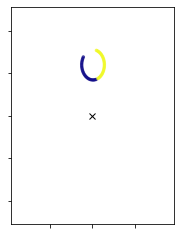

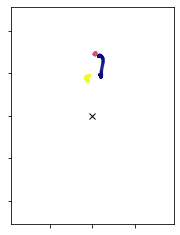

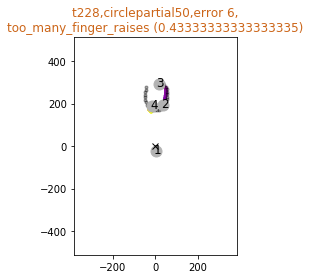

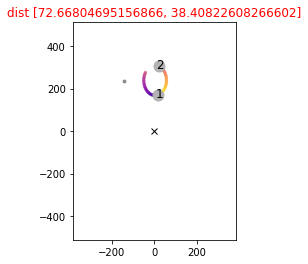

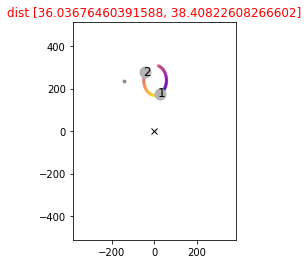

In [455]:
        ## DEBUG CODE, goes thru random trials, for each trial plots the strokes on canvas
        # and lists the durs and lengths.
# === go thru random trials, plot and show the times and distances
targ = {
    "fracsuccess_min":[0.2]
}
trials_list = getIndsTrials(filedata, targ)

trial = random.sample(range(len(trials_list)),1)[0]

stroke_dict_plot = getMultTrialsStrokeDict(filedata, [trials_list[trial]])
_, times, lengths = processRemoveShortStrokes(stroke_dict_plot, long_output=True)
stroke_dict_plot = processBehTaskDistance(stroke_dict_plot)
# lengths = processRemoveShortStrokes(stroke_dict_plot, long_output=True)[2]

print(f"trial {[trials_list[trial]]}")
print(f"times (sec): {times}")
print(f"lengths: {lengths}")

strokes_task = stroke_dict_plot["strokes_all_task"][0]
orders = stroke_dict_plot["behtask_taskorders_all"][0]
distances = stroke_dict_plot["behtask_distances_all"][0]

plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all_task", strokes_to_plot="all", plotver="strokes")
plotDictCanvasOverlay(stroke_dict_plot, filedata, "strokes_all", plotver="strokes")
plotTrialSimple(filedata, trials_list[trial])

for o,d in zip(orders, distances):
    ax = plotTrialSimple(filedata, 1, plotver="empty")[0]
    strokesthis = [strokes_task[i] for i in o]
    strokes_this = fakeTimesteps(strokesthis, strokes_this[0][0,[0,1]], "from_point")
    strokes_this = fakeTimesteps(strokesthis, [], "from_end_of_previous_stroke")
    plotDatStrokes(strokes_this, ax=ax, plotver="raw")
    plt.title(f"dist {d}")


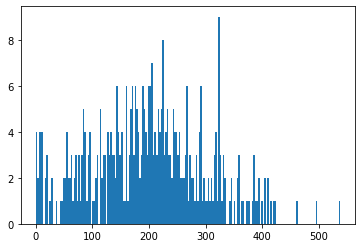

In [390]:

from tools.analy import *

# %matplotlib notebook
plt.figure()
plt.hist(processRemoveShortStrokes(stroke_dict_tmp, long_output=True)[2], 200)
plt.show()
%matplotlib inline

In [343]:
durs = processRemoveShortStrokes(stroke_dict_tmp)
durs

[[1.096, 0.9760000000000009, 0.8320000000000007],
 [0.8199999999999998, 0.4079999999999999],
 [1.1760000000000002, 1.1319999999999997],
 [1.1760000000000002, 0.6799999999999997],
 [0.6079999999999997, 1.2720000000000002],
 [0.7440000000000007, 0.8759999999999994, 0.7839999999999989],
 [1.5479999999999998],
 [1.228, 1.2840000000000003],
 [1.2],
 [1.0199999999999998, 1.2680000000000002],
 [1.1760000000000002, 0.472, 0.1080000000000001],
 [0.9359999999999999, 0.9079999999999999],
 [0.94],
 [1.1, 1.1399999999999997],
 [1.308, 0.6479999999999997],
 [1.464],
 [1.0959999999999999, 0.7840000000000003],
 [0.9160000000000001],
 [1.148, 0.8919999999999999],
 [1.1720000000000002, 0.6839999999999997, 2.064],
 [1.2119999999999997, 0.4559999999999995, 0.09999999999999964],
 [1.2120000000000002, 0.476, 0.09600000000000009],
 [0.8639999999999999,
  1.0959999999999996,
  0.6079999999999997,
  0.6799999999999997],
 [1.396],
 [1.3920000000000001, 1.1279999999999997],
 [1.2799999999999994],
 [1.14400000000

In [184]:
# ==== given weights on ordering (which would come from a model), calculate the distance 
# between model and behavior.

SyntaxError: unexpected EOF while parsing (<ipython-input-184-6b257ca75174>, line 79)

In [ ]:
## TODO
## 1) remove very short strokes

## 2) if beh is one long stroke, and task is many short strokes, then chop up the behavior.




In [82]:
strokes_beh[1][-1,2] - strokes_beh[1][0,2]

0.7800000000000002

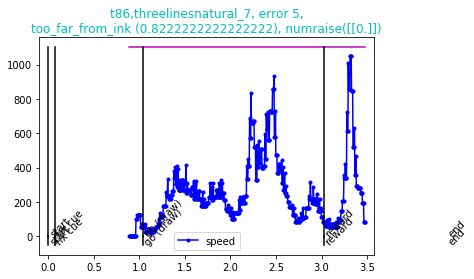

In [92]:
plotTrialSimpleTimecourse(filedata, trials_list[trial], plotver="speed")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6102d61e90>, None)

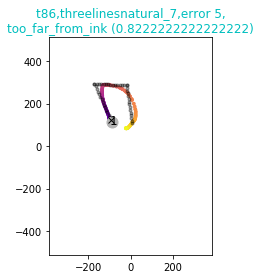

In [93]:
plotTrialSimple(filedata, trials_list[trial])

[549]
{'peak_heights': array([-70.]), 'prominences': array([326.16214413]), 'left_bases': array([364]), 'right_bases': array([611])}


[3.0860000000000003]

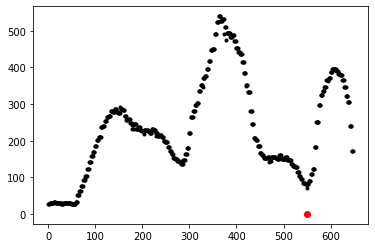

In [98]:
getTrialsSpeedMinima(filedata, trials_list[trial], plot_debug=True, window=0.3)


In [138]:
# this table will store the cost of the minimum paths
# TODO: make this assymetric, so that cannot go from (0,0) to (0,1)
table = {}

x = [1,1,1,5,3,3]
y = [1,2,6,1]

def distance(n,m):
    return (n - m)**2

def minimumCostPath(i,j):
    # figures out the cost of the shortest path which uses the first i members of x and the first j members of y
    if (i,j) in table: return table[(i,j)]

    cost = distance(x[i], y[j])
    if i > 0 and j > 0:        
        cost += min(minimumCostPath(i - 1, j - 1),
                    minimumCostPath(i - 1, j),
                    minimumCostPath(i, j - 1))
    elif i > 0:
        cost += minimumCostPath(i - 1, j)
    elif j > 0:
        cost += minimumCostPath(i, j - 1)

    table[(i,j)] = cost

    return cost

def optimalAlignment(i,j):
    assert (i,j) in table, "first you have to compute the minimum cost path"

    thisCost = table[(i,j)]
    residual = thisCost - distance(x[i], y[j])

    if i > 0 and j > 0 and table[(i - 1, j - 1)] == residual:
        alignment = optimalAlignment(i - 1, j - 1)
    elif i > 0 and table[(i - 1, j)] == residual:
        alignment = optimalAlignment(i - 1, j)
    elif j > 0 and table[(i, j - 1)] == residual:
        alignment = optimalAlignment(i, j - 1)
    elif j == 0 and i == 0:
        alignment = []
    else:
        assert False, "this should be impossible"

    alignment.append((i,j))

    return alignment

print("the minimum cost is",
      minimumCostPath(len(x) - 1,
                      len(y) - 1))
print("the alignment with this minimum cost is",
      optimalAlignment(len(x) - 1,
                       len(y) - 1))

the minimum cost is 10
the alignment with this minimum cost is [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]


In [139]:
table

{(0, 0): 0,
 (1, 0): 0,
 (2, 0): 0,
 (0, 1): 1,
 (1, 1): 1,
 (2, 1): 1,
 (3, 0): 16,
 (3, 1): 9,
 (0, 2): 26,
 (1, 2): 26,
 (2, 2): 26,
 (3, 2): 2,
 (4, 0): 20,
 (4, 1): 10,
 (4, 2): 11,
 (0, 3): 26,
 (1, 3): 26,
 (2, 3): 26,
 (3, 3): 18,
 (4, 3): 6,
 (5, 0): 24,
 (5, 1): 11,
 (5, 2): 19,
 (5, 3): 10}

In [134]:
optimalAlignment(5,3)


[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]

In [137]:
optimalAlignment(3,4)


[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4)]